In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


In [9]:
model1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10, batch_size=64,
                      validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7631 - loss: 0.6948 - val_accuracy: 0.8439 - val_loss: 0.4408
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8564 - loss: 0.4028 - val_accuracy: 0.8540 - val_loss: 0.4014
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.3537 - val_accuracy: 0.8599 - val_loss: 0.3897
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8796 - loss: 0.3303 - val_accuracy: 0.8552 - val_loss: 0.3994
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8861 - loss: 0.3085 - val_accuracy: 0.8645 - val_loss: 0.3697
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8929 - loss: 0.2891 - val_accuracy: 0.8732 - val_loss: 0.3548
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8968 - loss: 0.2811 - val_accuracy: 0.8751 - val_loss: 0.3417
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9022 - loss: 0.2622 - val_accuracy: 0.

In [23]:
model2 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=20, batch_size=64,
                      validation_data=(x_test, y_test))


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7093 - loss: 0.8705 - val_accuracy: 0.8432 - val_loss: 0.4683
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8434 - loss: 0.4841 - val_accuracy: 0.8609 - val_loss: 0.4258
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8661 - loss: 0.4061 - val_accuracy: 0.8656 - val_loss: 0.4064
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8734 - loss: 0.3746 - val_accuracy: 0.8672 - val_loss: 0.3842
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8815 - loss: 0.3485 - val_accuracy: 0.8703 - val_loss: 0.3894
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 0.3340 - val_accuracy: 0.8757 - val_loss: 0.3611
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8867 - loss: 0.3182 - val_accuracy: 0.8798 - val_loss: 0.3521
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8922 - loss: 0.3015 - val_accuracy: 0.

In [11]:
model3 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28*28,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=20, batch_size=64,
                      validation_data=(x_test, y_test))


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7696 - loss: 1.0792 - val_accuracy: 0.8384 - val_loss: 0.6605
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8507 - loss: 0.6074 - val_accuracy: 0.8333 - val_loss: 0.6103
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8590 - loss: 0.5324 - val_accuracy: 0.8513 - val_loss: 0.5331
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8659 - loss: 0.4922 - val_accuracy: 0.8456 - val_loss: 0.5472
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8694 - loss: 0.4676 - val_accuracy: 0.8593 - val_loss: 0.4928
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8732 - loss: 0.4542 - val_accuracy: 0.8634 - val_loss: 0.4777
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8719 - loss: 0.4452 - val_accuracy: 0.8623 - val_loss: 0.4711
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8761 - loss: 0.4302 - val_accuracy: 0.

In [12]:
model4 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, epochs=20, batch_size=64,
                      validation_data=(x_test, y_test))


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6343 - loss: 1.0019 - val_accuracy: 0.8254 - val_loss: 0.4847
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8073 - loss: 0.5383 - val_accuracy: 0.8433 - val_loss: 0.4296
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8262 - loss: 0.4878 - val_accuracy: 0.8461 - val_loss: 0.4158
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8366 - loss: 0.4516 - val_accuracy: 0.8497 - val_loss: 0.4064
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8437 - loss: 0.4334 - val_accuracy: 0.8601 - val_loss: 0.3887
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8466 - loss: 0.4214 - val_accuracy: 0.8613 - val_loss: 0.3857
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8515 - loss: 0.4103 - val_accuracy: 0.8634 - val_loss: 0.3732
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.4001 - val_accuracy: 0.

In [24]:
test_acc1 = model1.evaluate(x_test, y_test)[1]
test_acc2 = model2.evaluate(x_test, y_test)[1]
test_acc3 = model3.evaluate(x_test, y_test)[1]
test_acc4 = model4.evaluate(x_test, y_test)[1]

print(f'Model 1 Accuracy: {test_acc1:.2%}')
print(f'Model 2 Accuracy: {test_acc2:.2%}')
print(f'Model 3 Accuracy: {test_acc3:.2%}')
print(f'Model 4 Accuracy: {test_acc4:.2%}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 0.3253
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8852 - loss: 0.3449
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - loss: 0.4248
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3520
Model 1 Accuracy: 88.27%
Model 2 Accuracy: 88.64%
Model 3 Accuracy: 87.32%
Model 4 Accuracy: 87.52%


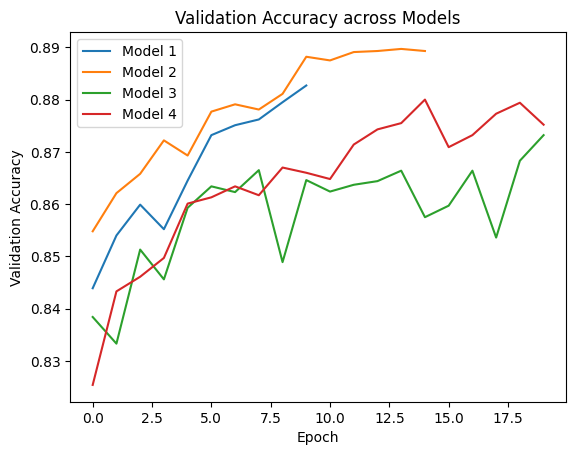

In [14]:
def plot_history(histories, title):
    for i, history in enumerate(histories, 1):
        plt.plot(history.history['val_accuracy'], label=f'Model {i}')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

plot_history([history1, history2, history3, history4], 'Validation Accuracy across Models')
